<a href="https://colab.research.google.com/github/Alankaar63/Data-Analysis-With-Python/blob/main/RidgeRegression_for_nData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

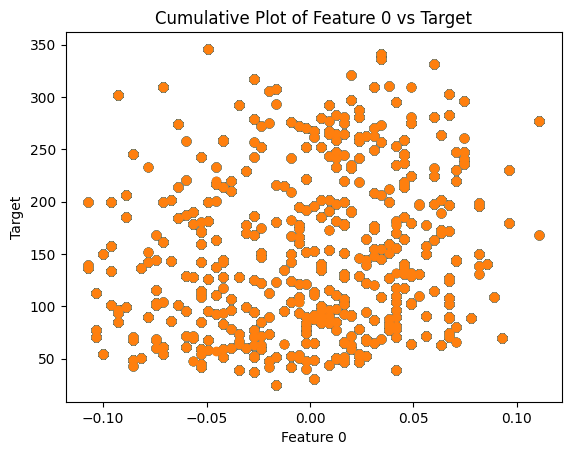

In [4]:
import matplotlib.pyplot as plt

for i in range(1, len(X) + 1):
    plt.scatter(X[:i,0], y[:i])
plt.xlabel("Feature 0")
plt.ylabel("Target")
plt.title("Cumulative Plot of Feature 0 vs Target")
plt.show()


In [10]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1,solver='cholesky')
rr.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [11]:
from sklearn.metrics import r2_score
ypreds = rr.predict(X_test)
r2 = r2_score(y_test,ypreds)
print(r2)

0.46085219464119265


In [12]:
print(rr.coef_)
print(rr.intercept_)

[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
151.45857456679613


In [13]:
#now our own version of Ridge for n-dimensional Datasets
class myRidge:
  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    print(X_train)

    I = np.identity(X_train.shape[1])
    I[0][0] = 0
    result = np.linalg.inv(X_train.T @ X_train + self.alpha*I)@(X_train.T @ y_train)

    self.intercept_ = result[0]
    self.coef_  = result[1:]
    print(self.intercept_)
    print(self.coef_)

  def predict(X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [14]:
reg = myRidge(0.1)
reg.fit(X_train,y_train)

[[ 1.00000000e+00  7.07687525e-02  5.06801187e-02 ...  3.43088589e-02
   2.73640491e-02 -1.07769750e-03]
 [ 1.00000000e+00 -9.14709343e-03  5.06801187e-02 ...  7.12099798e-02
   2.72478149e-04  1.96328371e-02]
 [ 1.00000000e+00  5.38306037e-03 -4.46416365e-02 ... -2.59226200e-03
   1.70360713e-02 -1.35040182e-02]
 ...
 [ 1.00000000e+00  3.08108295e-02 -4.46416365e-02 ... -3.94933829e-02
  -1.09032507e-02 -1.07769750e-03]
 [ 1.00000000e+00 -1.27796319e-02 -4.46416365e-02 ... -2.59226200e-03
  -3.84597173e-02 -3.83566597e-02]
 [ 1.00000000e+00 -9.26954778e-02 -4.46416365e-02 ... -3.94933829e-02
  -5.14218980e-03 -1.07769750e-03]]
151.4585745667961
[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
